## K-means Implementation

In [ ]:
import numpy as np

In [ ]:
def initialize_centroids(data, k):
  num_attributes = data.shape[1]
  min_values = np.min(data, axis=0)
  max_values = np.max(data, axis=0)

  np.random.seed(0)
  centroids = np.random.uniform(min_values, max_values, size=(k, num_attributes))

  return centroids

In [ ]:
def assign_to_nearest_centroid(data, centroids):
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
    labels = np.argmin(distances, axis=1)

    return labels


In [ ]:
def recalculate_centroids(data, labels, k):
    centroids = np.zeros((k, data.shape[1]))

    for i in range(k):
        cluster_points = data[labels == i]

        if len(cluster_points) > 0:
            centroids[i] = np.mean(cluster_points, axis=0)

    return centroids

In [ ]:
def has_converged(centroids, new_centroids, tolerance=1e-4):
    diff = np.linalg.norm(centroids - new_centroids)

    return diff < tolerance


In [ ]:
def implemented_kmeans(data, k, max_iterations=100):

    # Initialize centroids randomly
    centroids = initialize_centroids(data, k)

    for _ in range(max_iterations):

        # Assign each point to the nearest centroid
        labels = assign_to_nearest_centroid(data, centroids)

        # Recalculate centroids based on assignments
        new_centroids = recalculate_centroids(data, labels, k)

        # Check if centroids have converged
        converged = has_converged(centroids, new_centroids)
        if(converged):
          break

        # Update centroids
        centroids = new_centroids

    return labels

## Implementation of the imageToData function

In [ ]:
import cv2
import numpy as np

def imageToData(I):
    # Check if the input image is valid
    if I is None:
        raise ValueError("The input image is invalid.")

    # Get the dimensions of the image
    height, width, channels = I.shape

    # Reshape the image to a (n x 3) matrix, where n is the number of pixels
    data = I.reshape(-1, 3)

    return data

## Implementation of the segmentImage function

In [ ]:
import numpy as np

def segmentImage(I, k):
    # Converts the image to a data matrix
    data = imageToData(I)

    # Runs the K-means algorithm to get the labels
    labels = implemented_kmeans(data, k)

    # Converts the labels to integer values
    labels = labels.astype(int)

    # Creates a color map to map labels to colors
    colormap = np.random.randint(0, 256, size=(k, 3), dtype=np.uint8)

    # Assigns the label values to colors and creates the segmented image
    segmented_image = colormap[labels].reshape(I.shape)

    return segmented_image

## Example of image segmentation

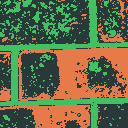

In [ ]:
import cv2
from google.colab.patches import cv2_imshow


image = cv2.imread('/content/drive/MyDrive/sexto-semestre/topima/tm1/Vistex/Vistex/c010_007.png')

k = 3  # Number of clusters (adjust as needed)
segmented_image = segmentImage(image, k)

cv2_imshow(segmented_image)

## Comparison of my K-means with scikit-learn's

In [ ]:
from sklearn.cluster import KMeans

image = cv2.imread('/content/drive/MyDrive/sexto-semestre/topima/tm1/Vistex/Vistex/c010_007.png')
data = imageToData(image)

k = 3
kmeans = KMeans(k, random_state=0)
model = kmeans.fit(data)
groups = model.predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
import matplotlib.pyplot as plt

def plot_sklearn_kmeans(model, data, groups, k):
  ax = plt.gca()
  ax.set_title('scikit-learn K-means')
  ax.grid(True)
  ax.axis('equal')

  ax.scatter(data[:, 0], data[:, 1], c=groups, s=40, cmap='viridis')

  centers = model.cluster_centers_
  ax.scatter(centers[:, 0], centers[:, 1], s=50, c='black')

In [ ]:
def plot_implemented_kmeans(data, k):

  # Runs K-Means with k=3 (you can adjust k to your case)
  labels = implemented_kmeans(data, k)

  # Gets the final centroids after convergence
  centroids = recalculate_centroids(data, labels, k)

  # Plots the data and the centroids
  plt.figure(figsize=(8, 6))

  # Plots the data points colored according to the assigned clusters
  for i in range(k):
      cluster_data = data[labels == i]
      plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {i + 1}')

  # Plots the centroids as black points
  plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=100, label='Centroids')

  plt.title(f'Implemented K-means')
  plt.legend()
  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.grid(True)
  plt.show()

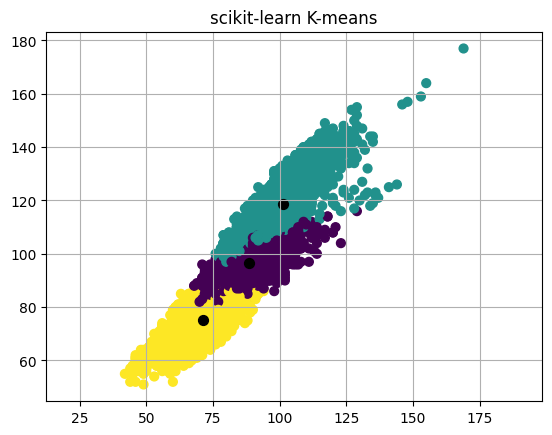

In [ ]:
plot_sklearn_kmeans(model, data, groups, k)

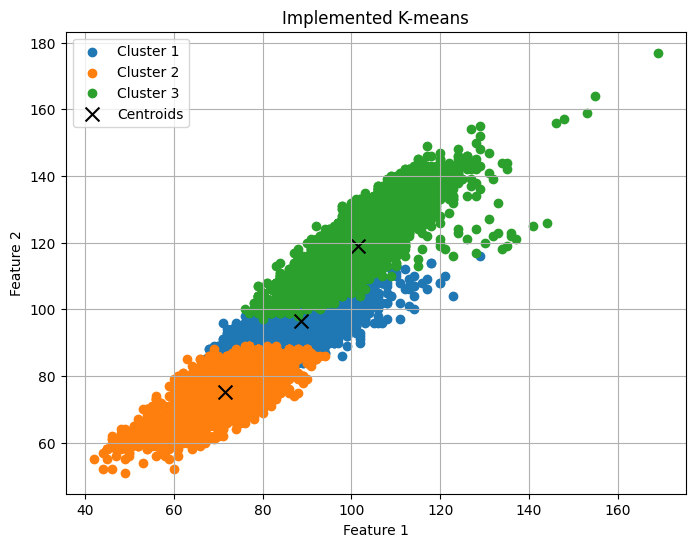

In [ ]:
plot_implemented_kmeans(data, k)